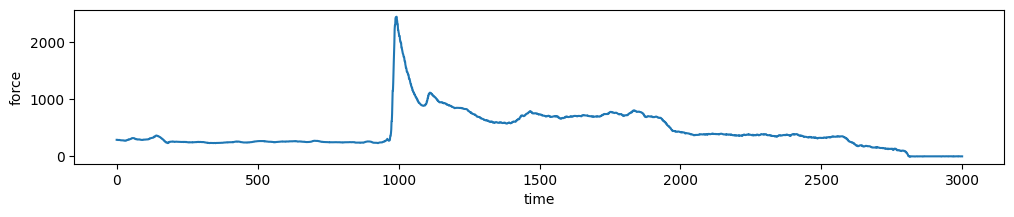

In [1]:
import pandas as pd
df2=pd.read_csv("older_S01_rd1.csv",header=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 2)) 
plt.plot(df2["Time"],df2["Grip Force(g)"])
plt.xlabel("time")
plt.ylabel("force")
plt.show()

In [25]:
df2=pd.read_csv("older_S01_rd1.csv",header=1)
# Create a pandas Series from your list of values
df2_Trig= df2["Trig"]
# Use boolean indexing to find the first index where the value is greater than 15
T1 = df2_Trig.gt(0).idxmax();
T1_force = df2["Grip Force(g)"][T1]
T3_force = T1_force*1.2

subset = df["Grip Force(g)"][T1:T1+200]
grip_force_data = list(df["Grip Force(g)"])
max_value = max(subset)
max_index = grip_force_data.index(max_value) + 1
    
T2 = max_index 
T3 = df2["Grip Force(g)"][T2:T2+1000].lt(T3_force).idxmax()
len(df2)

3000

T1: 938 
 T2: 994 
 T2-T1: 56 
 T3: 2593 
 peak force 2439.6
Number of peaks between T2 and T3: 208
Number of valleys between T2 and T3: 208


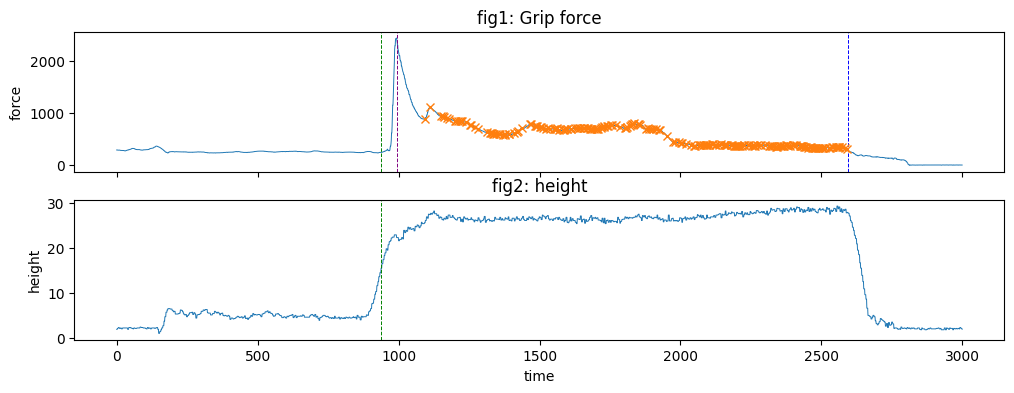

T1: 1044 
 T2: 1099 
 T2-T1: 55 
 T3: 1637 
 peak force 3007.3
Number of peaks between T2 and T3: 50
Number of valleys between T2 and T3: 50


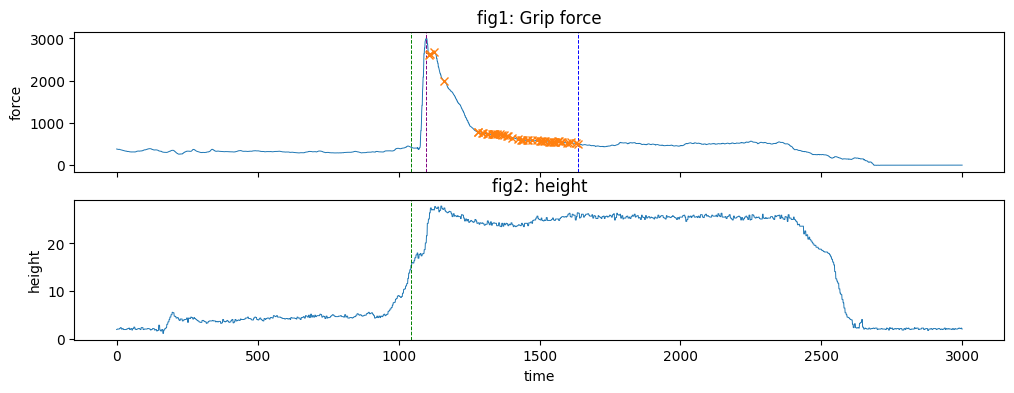

T1: 977 
 T2: 1033 
 T2-T1: 56 
 T3: 1330 
 peak force 2788.8
Number of peaks between T2 and T3: 16
Number of valleys between T2 and T3: 16


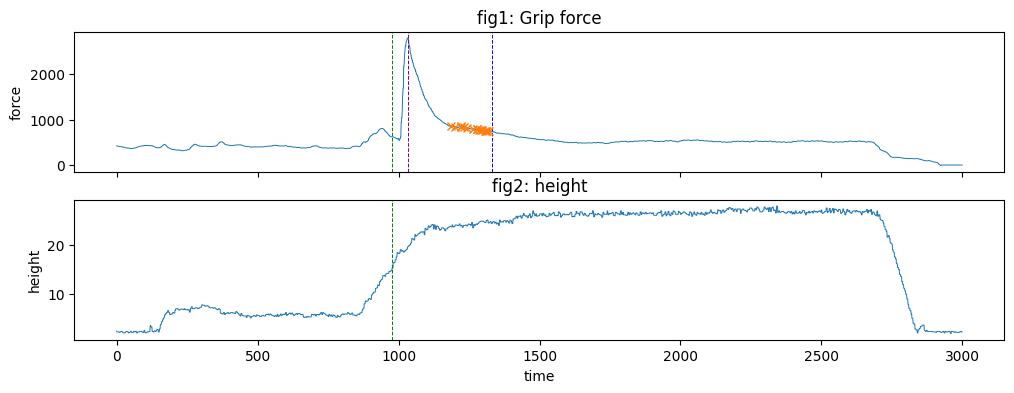

T1: 944 
 T2: 994 
 T2-T1: 50 
 T3: 1113 
 peak force 2877.6
Number of peaks between T2 and T3: 0
Number of valleys between T2 and T3: 0


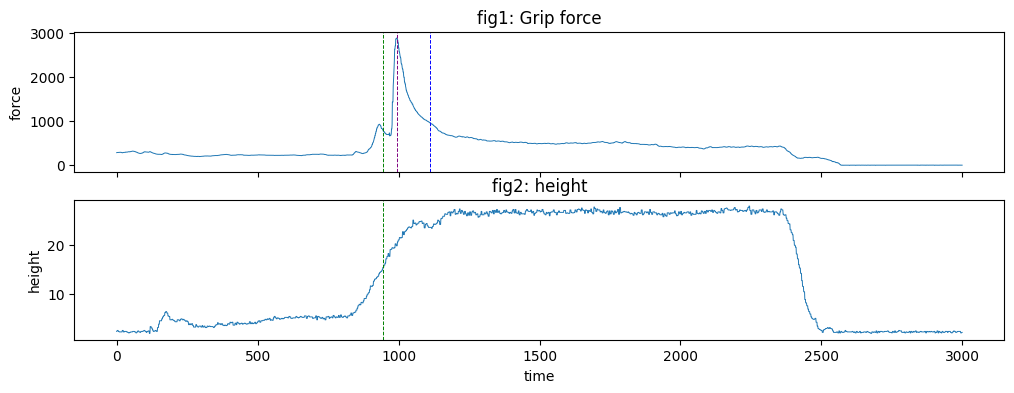

T1: 958 
 T2: 1007 
 T2-T1: 49 
 T3: 1234 
 peak force 2394.3
Number of peaks between T2 and T3: 14
Number of valleys between T2 and T3: 14


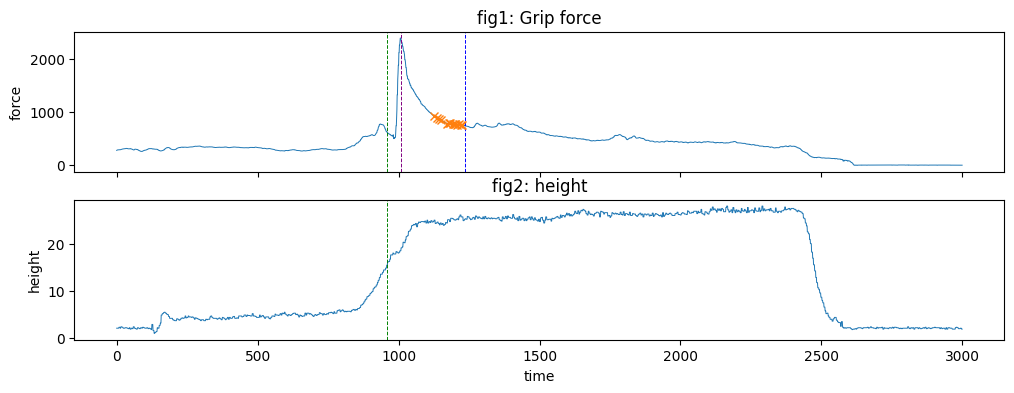

In [41]:
#儲存圖片檔
import pandas as pd
from scipy.signal import find_peaks
dataframes = {}  # 創建一個字典來存儲dataframe

for i in range(1, 6):
    file_name = f"older_S01_rd{i}.csv"
    df = pd.read_csv(file_name, header=1)
    # Create a pandas Series from your list of values
    df_Trig= df["Trig"]
    # Use boolean indexing to find the first index where the value is greater than 15
    T1 = df_Trig.gt(0).idxmax()
    # 計算出T3的力道
    T1_force = df["Grip Force(g)"][T1]
    T3_force = T1_force*1.2
    
    subset = df["Grip Force(g)"][T1:T1+200]
    grip_force_data = list(df["Grip Force(g)"])
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    
    T2 = max_index    
    T3 = df["Grip Force(g)"][T2:len(df)].lt(T3_force).idxmax()


    # 找出T2和T3之間的波峰
    force_between_T2_T3 = df["Grip Force(g)"][T2:T3]
    peaks, _ = find_peaks(force_between_T2_T3)
    # 找出T2和T3之間的波谷（反轉數據來找）
    valleys, _ = find_peaks(-force_between_T2_T3)
    
    print("T1:",T1,"\n","T2:",T2,"\n","T2-T1:",T2-T1,"\n","T3:",T3,"\n","peak force",max_value)
    print("Number of peaks between T2 and T3:", len(peaks))
    print("Number of valleys between T2 and T3:", len(valleys))
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
    # 繪製第一個子圖
    axs[0].plot(df["Time"],df["Grip Force(g)"],linewidth=0.7)
    axs[0].set_ylabel('force')
    axs[0].set_title('fig1: Grip force')
    # 在第一個子圖上添加虛線
    axs[0].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    axs[0].axvline(x=T2, color='purple', linestyle='--', linewidth=0.7)
    axs[0].axvline(x=T3, color='blue', linestyle='--', linewidth=0.7)
    # 在第一個子圖上標記波峰和波谷
    axs[0].plot(df["Time"][T2:T3].iloc[peaks], force_between_T2_T3.iloc[peaks], "x")
   # axs[0].plot(df["Time"][T2:T3].iloc[valleys], force_between_T2_T3.iloc[valleys], "o")

    # 繪製第二個子圖
    axs[1].plot(df["Time"],df["Height (cm)"],linewidth=0.7)
    axs[1].set_ylabel('height')
    axs[1].set_title('fig2: height')
    # 在第二個子圖上添加虛線
    axs[1].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    
    plt.xlabel("time")
    plt.savefig(f'older_rd{i}.jpg')
    plt.show()

In [4]:
# 儲存記錄檔

results = []  # 創建一個列表來存儲每次迴圈的結果

for i in range(1, 6):
    file_name = f"older_S01_rd{i}.csv"
    df = pd.read_csv(file_name, header=1)
    
    # 從DataFrame中取出Height列
    df_Trig= df["Trig"]
    
    # 找到Height大於15的第一個索引
    T1 = df_Trig.gt(0).idxmax()
    
    # 從Grip Force列取出T1之後100個數據
    subset = df["Grip Force(g)"][T1:T1+200]
    grip_force_data = list(df["Grip Force(g)"])
    
    # 找到subset中的最大值和相對應的索引
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    
    # 計算T2-T1的值
    delta_T = max_index - T1
    
    # 將計算結果添加到列表中
    results.append((T1,T2,delta_T, max_value))

# 將結果轉換為DataFrame
results_df = pd.DataFrame(results, columns=["T1","T2","T2-T1", "peak force"])

# 將結果儲存為Excel檔案
results_df.to_csv("results_rd.csv", index=False)